In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loandefault/train.csv
/kaggle/input/loandefault/test.csv
/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv
/kaggle/input/loan-prediction/cleaned_data.csv


Accuracy: 0.5573770491803278
Precision: 0.5573770491803278
Recall: 0.5573770491803278
F1 Score: 0.5573770491803278


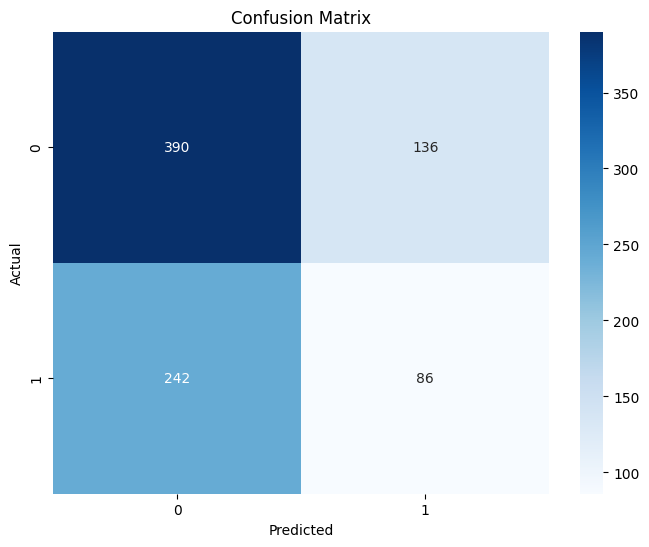

Confusion Matrix:
  [[390 136]
 [242  86]]


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv')
df.drop(['loan_id'], axis=1, inplace=True)
df.columns

label_encoder = LabelEncoder()
df[[' self_employed', ' education']] = df[[' education', ' self_employed']].apply(LabelEncoder().fit_transform)
numerical = df.select_dtypes(include=np.number)

X = numerical
Y = df[" loan_status"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

bc = KNeighborsClassifier()
bc.fit(X_train, Y_train)
pred = bc.predict(X_test)

# Calculating metrics
accuracy = accuracy_score(Y_test, pred)
precision = precision_score(Y_test, pred, average='micro')
recall = recall_score(Y_test, pred, average='micro')
f1 = f1_score(Y_test, pred, average='micro')

# Printing metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Printing colored confusion matrix
cm = confusion_matrix(Y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix:\n ",confusion_matrix(Y_test, pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     12275
           1       0.12      0.01      0.02      1218

    accuracy                           0.90     13493
   macro avg       0.51      0.50      0.48     13493
weighted avg       0.84      0.90      0.87     13493


Accuracy: 0.9033572963758986
Precision: 0.11607142857142858
Recall: 0.010673234811165846
F1 Score: 0.019548872180451125


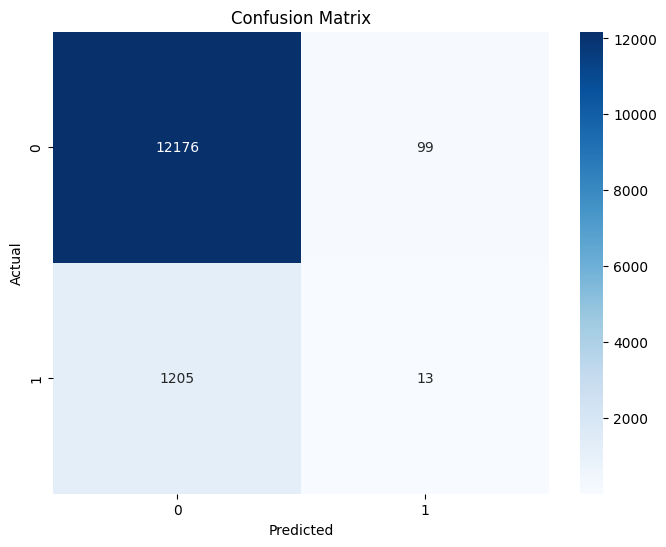

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the preprocessed dataset
data = pd.read_csv('/kaggle/input/loandefault/train.csv')

# Select the relevant features and target variable
X = data[['Loan Amount', 'Interest Rate', 'Debit to Income']]
y = data['Loan Status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling if required
# ...

# Create and train the KNN classifier
k = 5  # number of neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Calculate the metrics
# print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
# print(cm)

print("\nClassification Report:")
cr = classification_report(y_test, y_pred)
print(cr)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

# Plot the colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.625
Precision: 0.7
Recall: 0.8235294117647058
F1 Score: 0.7567567567567567


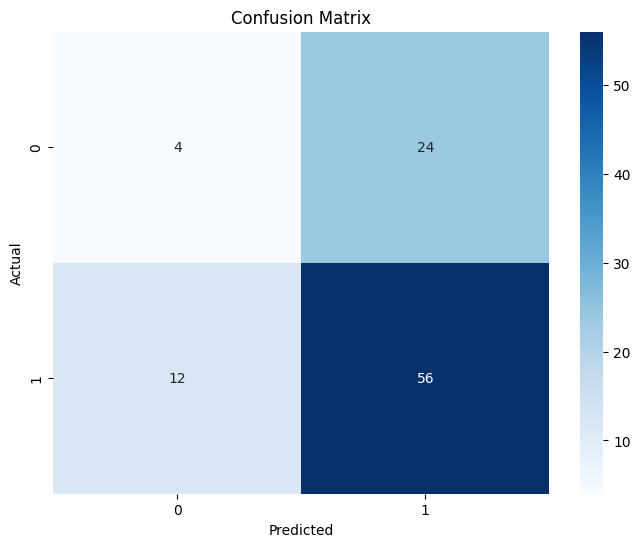

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/loan-prediction/cleaned_data.csv')

# Split the data into features (X) and target variable (y)
X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Calculate the precision, recall, and F1-score manually from the confusion matrix
tn, fp, fn, tp = confusion_mat.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()